# P1: Modelado de un vehículo

# P2: Segimiento de Caminos

# P3: SLAM basado en EFK

# P4: Evitar Obstáculos

P5: Planificación de Caminos - Dijkstra

P6: Planificación de Caminos - A*

P7: Navegación Autónoma


<div style="color: red;">

Pendiente comentar algo más sobre la implemntación Python
    
    
</div>

\newpage

# Planificación de Caminos - Dijkstra

En este ejercicio se plantea realizar una planificación de caminos para un robot móvil, siendo necesario planificar el camino a realizar entre dos puntos o localizaciones muy distantes en el espacio. Para resolver este problema de planificación, dado que la ubicación inicial y final están separadas por largas distancias, se utilizan mapas topológicos y algoritmos de búsqueda en grafos. 

En esta práctica se plantea resolver el problema de encontrar un camino o ruta mediante el algoritmo de Dijkstra. Este algoritmo es un método de búsqueda desinformada en grafos, únicamente considerando el coste de los caminos que unen los nodos del grafo. El método de Dijkstra proporciona la ruta de menor coste entre un origen y un destino, siendo, por tanto, el camino óptimo. 

\newpage

## Ejercicio

Implementar el algoritmo de Dijkstra como una función de Matlab que devuelva el coste y la ruta óptima a partir de un origen y un destino pasados como parámetros, además del mapa topológico o grafo, que se le pasará a la función como una matriz NxN, que almacena el coste de llegar del nodo n1, como fila, al nodo n2, como columna. La función se debe implementar de forma que la llamada:

```
>> [coste, ruta]=dijkstra(G,1,7)
```

devuelva el coste de llegar desde el nodo origen al nodo destino, y un vector con la lista de nodos que componen la ruta (incluidos los nodos inicial y final). 


Por ejemplo, dado el mapa topológico y la matriz de costes correspondiente que se muestran a continuación: 

![E61enunciadoA.jpg](../P6/E61enunciadoA.jpg)

La función debe dar como resultado:
```
coste = 7 
ruta = [1 2 4 6 7] 
```

\newpage

### Implementación 

La implementación del algoritmo en Matlab se muestra a continuación: 

```C
function [coste, ruta] = Dijkstra(G,Origen,Fin)
    % G: matriz de adyacencia NxN con los costes entre nodos
    % Origen: nodo de inicio
    % Fin: nodo de destino
    % ruta: vector con la secuencia de nodos del camino más corto
    % coste: coste total del camino más corto desde Origen hasta Fin

    n = size(G,1);         % Número de nodos del grafo (asumiendo G es cuadrada)
    dist = Inf(n,1);       % Vector con las distancias mínimas conocidas desde Origen a cada nodo
    nodo_ant = NaN(n,1);   % Vector para almacenar el nodo anterior en el camino más corto
    visitados = false(n,1);% Vector lógico que marca si un nodo ha sido visitado
    dist(Origen) = 0;      % La distancia desde el Origen a sí mismo es 0

    for i = 1:n
        % Encuentra el nodo no visitado con la menor distancia conocida
        [~, u] = min(dist);

        % Marca este nodo como visitado
        visitados(u) = true;

        % Si se alcanza el nodo destino, se puede terminar el algoritmo
        if u == Fin
            break;
        end

        % Recorre todos los nodos vecinos del nodo actual
        for v = 1:n
            % Si hay conexión y el nodo no ha sido visitado
            if G(u,v) > 0 && ~visitados(v)
                alt = dist(u) + G(u,v); % Calcula la distancia alternativa
                if alt < dist(v)        % Si esta nueva distancia es menor
                    dist(v) = alt;      % Se actualiza la distancia
                    nodo_ant(v) = u;    % Y se guarda el nodo anterior
                end
            end
        end

        dist(u) = Inf;  % Se evita volver a seleccionar el mismo nodo
    end

    % Reconstrucción del camino más corto
    ruta = [];
    u = Fin;
    while ~isnan(nodo_ant(u))
        ruta = [u, ruta];  % Se inserta el nodo actual al principio de la ruta
        u = nodo_ant(u);   % Se retrocede al nodo anterior
    end
    if ~isempty(ruta)
        ruta = [Origen, ruta]; % Se añade el nodo origen al principio
    end

    % Evaluación del coste final
    if isinf(dist(Fin))
        coste = NaN;          % Si no hay camino, se devuelve NaN
    else
        coste = dist(Fin);    % De lo contrario, se devuelve el coste óptimo
    end
end
```

### Pruebas

```
>> [coste, ruta] = Dijkstra(G,1,7)
coste =
     7
ruta =
     1     2     4     6     7
```

\newpage

## Ejercicio

Una vez realizada la función y comprobado que funciona adecuadamente, comprobar el algoritmo implementado con el siguiente mapa topológico: 

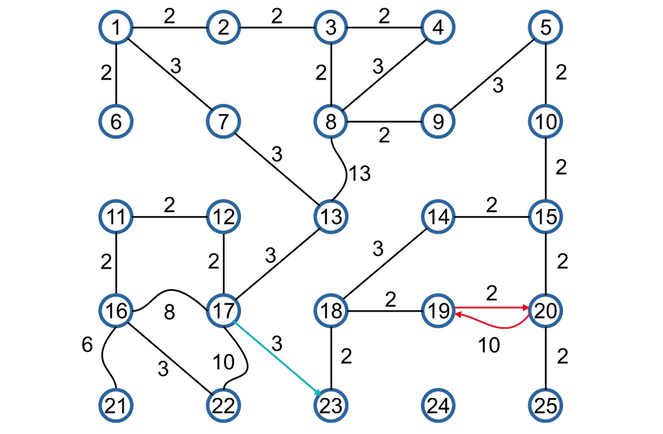

La matriz de coste del grafo anterior se proporciona en el archivo ‘grafos.mat’, y se muestra a continuación: 

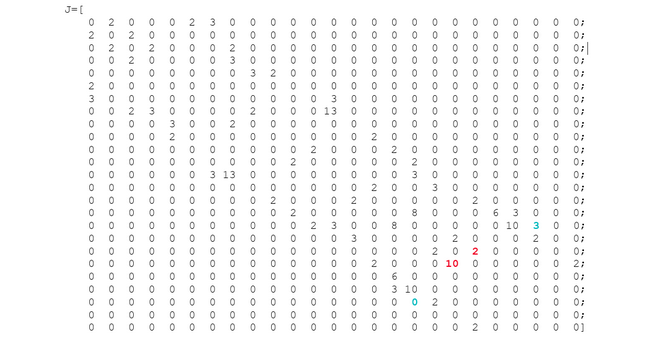

Observar la asimetría de la matriz en los costes de los arcos dirigidos. 

\newpage

Comprobar que los resultados obtenidos con los siguientes nodos iniciales y finales son:

Desde | Hasta | Coste |Ruta
------|-------|-------|-----
1 | 19|   16 | [1  7  13  17  23  18  19] 
19|  1|   19 | [19  20  15  10  5  9  8  3  2  1] 
25| 19|   11| [25  20  15  14  18  19]
19| 25|    4| [19  20  25] 
1 |231!|  12| [1  7  13  17  23] 
23|  1|   22| [23  18  14  15  10  5  9  8  3  2  1] 
1 | 24|  Inf| [] 
23| 22|   40| [23  18  14  15  10  5  9  8  3  2  1   7  13  17  12  11  16  22] 


### Pruebas

```
>> [coste, ruta] = Dijkstra(J,1,19)
coste =
    16
ruta =
     1     7    13    17    23    18    19

>> [coste, ruta] = Dijkstra(J,19,1)
coste =
    19
ruta =
    19    20    15    10     5     9     8     3     2     1

>> [coste, ruta] = Dijkstra(J,25,19)
coste =
    11
ruta =
    25    20    15    14    18    19

>> [coste, ruta] = Dijkstra(J,19,25)
coste =
     4
ruta =
    19    20    25

>> [coste, ruta] = Dijkstra(J,1,23)
coste =
    12
ruta =
     1     7    13    17    23
>> [coste, ruta] = Dijkstra(J,23,1)
coste =
    22
ruta =
    23    18    14    15    10     5     9     8     3     2     1

>> [coste, ruta] = Dijkstra(J,1,24)
coste =
   NaN
ruta =
     []

>> [coste, ruta] = Dijkstra(J,23,22)
coste =
    40
ruta =
    23    18    14    15    10     5     9     8     3     2     1     7    13    17    12    11    16    22
```

\newpage

## Apéndice: Implementación en Python

### Función auxiliar para obtener trayectoria

Se define una función recursiva para mostrar la trayectoria entre dos puntos a partir de la matriz de costes:

In [1]:
def trayectoria(costes, inicio, fin):
    if inicio == fin:
        return([costes[fin]])
    else:
        nomPrev = costes[fin][3]
        idxPrev = next((i for i, x in enumerate(costes) if x[1] == nomPrev), None)
        nodPrev = costes[idxPrev]
        return trayectoria(costes, inicio, nodPrev[0])+[costes[fin]]

### Algoritmo de Dijkstra

La implementación del algoritmo de dijsktra en Python es la siguiente:

In [2]:
def dijkstra(Adjacencia, nombres, inicio, fin):
    nodos =  [x for x in range(len(Adjacencia))]
    infinito = 1000
    ahora = inicio
    visitados = []
    # inicializa la lista de costes, cada uno con (identificador, nombre, coste)
    costes = [[n, nombres[n], 0 if n==inicio else infinito, None] for n in nodos]
    while ahora != fin:
        # añadir el nodo actual a la lista de visitados
        visitados.append(ahora)
        
        # actualizar los costes de todos los nodos adjacentes
        coste = costes[ahora][2]
        for i,a in enumerate(Adjacencia[ahora]):
            if i not in visitados and a > 0 and costes[i][2] > coste+a: 
                costes[i] = [i, nombres[i], coste+a, nombres[ahora]]
        
        # reordenar la lista de pendientes y quedarse con el de menor coste
        pendientes = sorted([x for x in costes if x[0] not in visitados], key=lambda x: x[2])
        ahora = pendientes[0][0]
    if costes[fin][2] < infinito:
        ruta = trayectoria(costes, inicio, fin)
        return costes[fin][2],[x[1] for x in ruta]        
    else:
        return ['Infinito', 'Nodo inalcanzable']

### Pruebas con el grafo de los apuntes

Validamos el algoritmo con el grafo de los apuntes. Para ello, a partir del grafo definimos la matriz de adyacencia teniendo en cuenta que el nombre de nodo 'S' se corresponde con el índice 0, el 'A' con el 1 y así sucesivamente (la variable Nombres contiene la lista con todos los nombres)

In [3]:
AdjacenciaTeo = [
    [0, 7, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], # S
    [7, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], # A
    [2, 3, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0], # B
    [0, 4, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0], # C
    [0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0], # D
    [0, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0], # E
    [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], # F
    [2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], # G
    [0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 0, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 4, 0], # I
    [0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 0, 4, 0], # J
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 5], # K
    [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0] # X
]
Nombres = "SABCDEFGHIJKX"
inicio, fin = 0, 12
total, ruta = dijkstra(AdjacenciaTeo, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde S hasta X = 7, ruta = ['S', 'B', 'D', 'F', 'X']


### Pruebas con el primer grafo

In [4]:
AdjacenciaP5a = [ # matriz de costes y adyacencia
    [0, 2, 0, 0, 9, 0, 0],
    [2, 0, 1, 2, 0, 0, 0],
    [0, 1, 0, 5, 0, 0, 0],
    [0, 2, 5, 0, 1, 2, 4],
    [9, 0, 0, 1, 0, 4, 0],
    [0, 0, 0, 2, 4, 0, 1],
    [0, 0, 0, 4, 0, 1, 0]]
Nombres = "1234567"
inicio, fin = 0, 6
total, ruta = dijkstra(AdjacenciaP5a, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 1 hasta 7 = 7, ruta = ['1', '2', '4', '6', '7']


### Pruebas con el segundo grafo

In [5]:
AdjacenciaP5b=[
[0, 2, 0, 0, 0, 2, 3, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[2, 0, 2, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 2, 0, 2, 0, 0, 0, 2,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 2, 0, 0, 0, 0, 3,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  3, 2, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[2, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[3, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 3,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 2, 3, 0, 0, 0, 0,  2, 0, 0, 0, 13, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 3, 0, 0, 2,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 2, 0, 0, 0,  0, 0, 0, 0, 0,  0, 2, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 2, 0,  0, 0, 2,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 2, 0, 0,  0, 0, 0,  2, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 3, 13, 0, 0, 0, 0, 0,  0, 0, 0,  3, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 2, 0,  0, 3, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 2, 0, 0, 0,  2, 0, 0,  0, 0, 0,  2, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 2, 0, 0,  0, 0, 0,  8, 0, 0,  0, 6, 3,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 2, 3,  0, 0, 8,  0, 0, 0,  0, 0, 10, 3, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  3, 0, 0,  0, 0, 2,  0, 0, 0,  2, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 2, 0,  2, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 2, 0,  0, 0, 10, 0, 0, 0,  0, 0, 2],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 6,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 3, 10, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 2, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0,  0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0,  0, 0, 0,  2, 0, 0,  0, 0, 0]]
Nombres=list(range(1, 26))

In [6]:
inicio, fin = 0, 18
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 1 hasta 19 = 16, ruta = [1, 7, 13, 17, 23, 18, 19]


In [7]:
inicio, fin = 18, 0
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 19 hasta 1 = 19, ruta = [19, 20, 15, 10, 5, 9, 8, 3, 2, 1]


In [8]:
inicio, fin = 24, 18
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 25 hasta 19 = 11, ruta = [25, 20, 15, 14, 18, 19]


In [9]:
inicio, fin = 18, 24
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 19 hasta 25 = 4, ruta = [19, 20, 25]


In [10]:
inicio, fin = 0, 22
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 1 hasta 23 = 12, ruta = [1, 7, 13, 17, 23]


In [11]:
inicio, fin = 22, 0
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 23 hasta 1 = 22, ruta = [23, 18, 14, 15, 10, 5, 9, 8, 3, 2, 1]


In [12]:
inicio, fin = 0, 23
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print(ruta)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Nodo inalcanzable
Djistra: total desde 1 hasta 24 = Infinito, ruta = Nodo inalcanzable


In [13]:
inicio, fin = 22, 21
total, ruta = dijkstra(AdjacenciaP5b, Nombres, inicio, fin)
print("Djistra: total desde {} hasta {} = {}, ruta = {}".format(
    Nombres[inicio], Nombres[fin], total, ruta))

Djistra: total desde 23 hasta 22 = 40, ruta = [23, 18, 14, 15, 10, 5, 9, 8, 3, 2, 1, 7, 13, 17, 12, 11, 16, 22]
